# Test Dataset Notebook

This notebook tests the `VigorDataset` from `src/data/datasets.py`. We will:

- Instantiate the training dataset (with `same_area=True` or `False` depending on what we want to test).
- Display a few samples.
- Check that the dataset logic is correct and that images and captions align.



In [2]:
import sys
import os
from pathlib import Path

# If needed, add the project root to sys.path so we can import from src
project_root = Path(os.getcwd()).parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root / 'src'))

from data.vigor_plus import VigorDataset
from torchvision import transforms
import matplotlib.pyplot as plt
import torch


In [3]:
query_transforms = transforms.Compose([
    transforms.Resize((256, 512)),
    transforms.ToTensor(),
])

reference_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])


In [9]:
data_folder = "/home/erzurumlu.1/yunus/research_drive/data/VIGOR"  # Adjust this to your actual data directory
dataset = VigorDataset(
    data_folder=data_folder,
    split='val',         # or 'val', depending on what you want to test
    same_area=False,        # set to False if you want to test cross-area splits
    transforms_query=query_transforms,
    transforms_reference=reference_transforms,
    use_captions=True
)

print(f"Dataset length: {len(dataset)}")


/home/erzurumlu.1/yunus/git/glip-loc/src/data/vigor_plus.py:80: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(f'{self.data_folder}/splits/{city}/satellite_list.txt',
/home/erzurumlu.1/yunus/git/glip-loc/src/data/vigor_plus.py:80: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(f'{self.data_folder}/splits/{city}/satellite_list.txt',
/home/erzurumlu.1/yunus/git/glip-loc/src/data/vigor_plus.py:104: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(f'{self.data_folder}/splits/{city}/{split_file}',
/home/erzurumlu.1/yunus/git/glip-loc/src/data/vigor_plus.py:104: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will b

Dataset length: 53694


Label (satellite index): 1202
Ground Caption: Alleyways beneath elevated train tracks showcase intersecting narrow lanes surrounded by residential garages. The tracks create a grid overhead, casting shadows. Houses are positioned left and right, tightly lined, while utility poles and wires span above. Open spaces are limited, with garages directly fronting the alley, enhancing urban density.
Satellite Caption: Aerial view shows residential buildings aligned parallel to a railway track running horizontally, with parking spaces behind the houses. The road is on the left, bordered by trees. Houses are compact and uniform in shape. The arrangement highlights the urban intersection of infrastructure and residential areas.


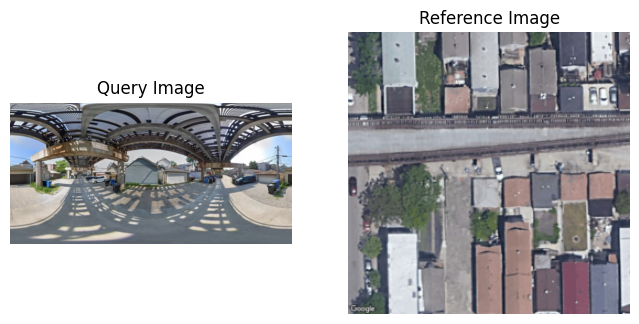

In [5]:
index_to_test = 0
query_img, reference_img, label, ground_caption, sat_caption = dataset[index_to_test]

print(f"Label (satellite index): {label.item()}")
print(f"Ground Caption: {ground_caption}")
print(f"Satellite Caption: {sat_caption}")

# query_img and reference_img are tensors of shape [C, H, W]. Convert them to [H, W, C] for visualization.
fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].imshow(query_img.permute(1,2,0))
axes[0].set_title("Query Image")
axes[0].axis('off')

axes[1].imshow(reference_img.permute(1,2,0))
axes[1].set_title("Reference Image")
axes[1].axis('off')

plt.show()


In [6]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
batch = next(iter(dataloader))

query_batch, reference_batch, label_batch, ground_captions, sat_captions = batch
print("Query batch shape:", query_batch.shape)
print("Reference batch shape:", reference_batch.shape)
print("Label batch shape:", label_batch.shape)
print("Ground captions:", ground_captions)
print("Satellite captions:", sat_captions)


Query batch shape: torch.Size([4, 3, 256, 512])
Reference batch shape: torch.Size([4, 3, 256, 256])
Label batch shape: torch.Size([4])
Ground captions: ('Visible is a spacious parking lot with a modern building featuring a geometric design directly ahead. Trees line the left side, and multiple parked cars are on the perimeter. The layout is open, with the building centrally located, positioned above the concrete lot that extends outward.', 'A bustling urban streetscape features tall, rectangular buildings lining both sides of a straight road. A major intersection is evident, with visible road barriers. Notable multi-story structures are aligned closely, creating a canyon-like effect. Sidewalks host trees and streetlights, while elevated tracks cross overhead, enhancing the city skyline.', 'The scene features urban buildings along major roads, with a prominent cylindrical structure centered ahead. A blue and brick rectangular building is on the left, and a concrete structure with overha